# 추천 시스템?

목적: 어떤 사용자 행동이나 아이템에 대한 정보로부터 사용자가 선호할 만한 관련아이템을 제시하는 것. 검색만으로는 선호하는 콘텐츠를 찾기 어려운 대규모 사이트에서 주로 활용함. 

**추천 시스템 알고리즘** 참고해서 특성 정리


분야

### 개요 추천

'이번 주의 인기상품' 처럼 통계를 활용하거나 편집자가 선택한 아이템을 추천하는 것처럼 개인화되지 않은 추천을 말한다. 시스템을 처음 쓰거나 가끔 쓰는 사용자에게 효과가 있다

### 사용자 평가

다른 사용자가 준 별점 / 댓글을 보여주거나 평균평점 같은 통계정보를 제공한다. 명시적인 추천은 아니지만, 다른 사람이 남긴 정보로부터 판단근거를 얻는다. 사용자 스스로 납득할 수 있는 선택을 하게 한다.

### 알림 서비스

푸시 알림이나 메일로 사용자가 흥미를 느낄 만한 아이템을 추천하여 사용자가 재방문하도록 유도한다. 추천시스템의 응용분야.

### 연관 아잍메 추천

원래 아이템과 함께 연관된 아이템이나 그 정보를 제시해서 동시구매를 유도하거나 다른 아이템과 비교할 수 있도록 한다. 아마존 같은 전자상거래에서는 정석 중의 정석.

### 개인화

인기 아이템 목록이나 편집자 추천목록 등 사용자가 흥미를 느낄 만한 아이템을 노출하여 해당 사용자가 마음에 드는 아이템을 찾도록 돕는다. 검색 결과를 개인별로 사용자화하는 것도 포함한다

---

추천 시스템의 입력 데이터는 보통

- 선호 데이터 (사용자가 아이템을 얼마나 선호하는가)
- 검색 쿼리 (검색어 정보)
- 비평 (상품이나 업체에 대한 댓글평)
- 아이템 특징 (상품 설명에 쓰인 단어 등에 대한 정보)
- 인구적 특징 (사용자의 성별이나 연령)
- 맥락적 특징 (추천받은 아이템을 사용한 날짜나 위치 정보, 재고현황처럼 추천과 관련된 맥락 정보들)

어려운 이유: 데이터가 매우 sparse하다. 인기영화는 평가정보가 많지만 그렇지 않은 영화는 정보가 없어 추천되지 못하는 경우가 많다.

아이템 평가 비용이 낮은 경우는 사람들의 선호 데이터를 비교적 쉽게 입수할 수 있음. 하지만 일생에 몇 번 없는 큰 이벤트의 경우 선호 데이터를 대량으로 얻기가 어렵다. 보통 이런 경우는 예식장 웹사이트의 페이지뷰 같은 간접적 지표를 쓴다.

## 데이터 입수방법 들여다보기

사용자에게 직접 물어 답변을 받는 '명시적 데이터', 사용자가 상품을 구매하거나 정보를 모으는 등 아이템에 흥미가 있다고 해석할 수 있는 '묵시적 데이터'를 모으는 방법이 있다.

양적인 면에서는 묵시적 데이터가 압도적이다. 통계적 방법을 사용하기 유리하다. 다만 데이터의 정확성 관점에서는 명시적 데이터가 훨씬 높다. 묵시적 데이터를 필터링하려면 '페이지 체류시간'같은 정보로 필터링하는 전처리가 필요함. '평가하지 않음 / 부정 평가' 구분이 불가능한 것도 묵시적 데이터의 단점. '비선호'에 해당하는 평가를 얻을 수가 없다. 

사용자 인지란 '데이터 수집 사실을 사용자에게 명확히 알려서, 시스템이 어떤 정보를 제공했는지 사용자가 이해하고 있는가를 말한다. '시스템이 사전에 '좋아하는 아티스트와 장르'를 물어본 다음, 아티스트와 연관된 곡'을 시스템이 추천하는 식 -> 사용자는 시스템이 근거있는 결과를 내놓는다고 생각하게 된다는 점에서 좋은 인상을 받을 수 있다.


## 알고리즘

- 평가 경향이 비슷한 사람을 찾거나 비슷한 평가를 받은 영화를 찾는 식의 '협업 필터링'
    - 비슷한 사람을 찾는 '사용자 기반 협업 필터링'
    - 비슷한 아이템을 찾는 '아이템 기반 협업 필터링'
        - 시스템이 갖고 있는 데이터에 기초에 직접 가까운 사용자 / 아이템을 추천하므로 '메모리 기반 협업 필터링'의 일종이다.
    
- 감독, 장르, 제목에 포함된 단어나 내용이 비슷한 영화를 찾는 '내용 기반 필터링'

이외에도 '회귀나 분류같은 예측 모델을 학습하는 '모델기반 협업필터링'도 있다. 


### 사용자 기반 협업 필터링

"당신과 비슷한 상품을 산 고객은 이런 상품도 샀다" 는 식의 추천을 제공하는 것.

협업 필터링은 사용자 - 아이템 각 쌍에 대한 평점 행렬이 있을 때, 행렬의 누락된 요소에 해당되는 평점을 예측한다.

1. 사용자 정보를 벡터로 나타낸다
2. 사용자 간의 유사도를 평가한다
3. 유사도를 기반으로 평점을 계산한다

유사도 = 두 대상이 비슷할수록 값이 커지고 다를수록 작아지는 척도다. 대표적인 유사도로는 '피어슨 상관계수', '코사인 유사도', '자카드 계수'가 있다.

* 피어슨 상관계수

```python
# i번째 사용자 U의 평점 벡터 u= user[i], j번째 사용자 V의 평점 벡터 v = user[j] 유사도 계산하기
from scipy.spatial.distance import correlation
1-correlation(u,v)
```

* 코사인 유사도

텍스트 문장 간의 거리를 측정하는 척도로 자주 쓰이며, 0~1 사이의 값을 갖는다.

```python
# i번째 사용자 U의 평점 벡터 u= user[i], j번째 사용자 V의 평점 벡터 v = user[j] 유사도 계산하기
from scipy.spatial.distance import cosine
1-cosine(u,v)
```

* 자카드 계수

집합과 집합 사이의 거리를 계산할 수 있으며, 0~1 사이의 값을 갖는다.

```python
# i번째 사용자 U의 평점 벡터 u= user[i], j번째 사용자 V의 평점 벡터 v = user[j] 유사도 계산하기
from scipy.spatial.distance import jaccard
1-jaccard(u,v)
```

문제에 따라 적합한 척도는 다르므도 다양한 방법을 시도해보길 권한다.

---

**사용자 기반 협업 필터링**은 성향이 비슷한 사용자가 선호하는 아이템을 제시하는 게 가장 간단하다. 가장 비슷한 k명의 사용자 평가를 평균하는 것.

(사용자 간의 유사도에 가중치를 두어 예측값을 구하는 방법도 있다. 비슷한 사용자의 평점에 더 높은 가치를 부여하는 식)

**아이템 기반 협업 필터링**은 피어슨 상관계수나 코사인 유사도를 이용해서 유사도가 높은 아이템을 찾는다. 또는 코사인 유사도 개량한 adjusted cosine similarity를 쓰기도 함

**모델 기반 협업 필터링**은 비지도 / 지도학습 모델로 데이터를 학습하고, 기존 데이터가 갖는 규칙성에 따라 예측하는 방법. '군집화 사용 모델', '평점에 대한 회귀모델', '토픽 모델을 사용한 방법', '행렬 분해' 등등이 사용된다.

- 군집화 사용 모델은 선호도가 비슷한 사용자를 군집으로 묶고, 어떤 사용자에게 자신이 속한 그룹이 선호하는 아이템 추천
- 회귀 모델은 선형회귀 등으로 모델 학습한 다음 평점을 예측하는 데 주로 쓰임
- 토픽 모델은 '평점 행렬의 차원을 축소해 "액션 장르 선호"같은 잠재적 의미가 드러나게 하는 기법'으로, 묵시적 데이터로도 예측이 가능하다.
    - 확률적 잠재의미 분석, 잠재 디라클레 할당(LDA) 등이 해당함
    
- 행렬 분해는 '미평가와 부정 평가의 차이'를 고려해야 하므로 명시적 데이터에만 쓸 수 있었다. 최근에 '행렬 인수분해' 방법으로 묵시적 데이터에도 적용 가능. SGD 방법으로 대규모 데이터에도 적용 가능하다고.

### 내용 기반 필터링

영화제목, 감독, 장르, 배우, 평판 등 아이템을 나타내는 정보에 주목하고, 이들의 과거 정보를 이용해서 추천 항목을 제시한다. 사용자 취향을 뜻하는 단어를 알 수 있다면, 그 정보를 통해 취향에 맞는 영화를 제시할 수 있다.


#### 협업 / 내용 기반 필터링의 장단점

협업 필터링: 장르나 텍스트에 포함된 단어 유사성이 필요 없기에 다양한 추천 결과를 받을 수 있다. 다만 신규 사용자나 새로운 아이템 추천은 어렵다 (데이터가 쌓이기 전까지는 신규 사용자나 새로운 아이템 추천이 어렵기 때문).

내용 기반: 누적된 행동 데이터가 없는 상황에서도 적절한 추천이 가능함. 하지만 한국어의 경우 형태소분석 / 사전 유지보수 등 도메인 특화 정보를 어떻게 다룰지... 의 문제가 생김

## 평가 척도

정확도: 예측 결과와 사용자 평점을 비교

정밀도(precision) / 재현율(recall): 예측 결과 중 정답의 비율, 전체 정답 중 실제 맞춘 정답의 비율.

회귀로 예측한 평점은 MAE(평균 절대오차), RMSE. RMSE는 MAE에 비해 아웃라이어에 취약하다.

그 외에도 'rank correlation' - 추천 아이템의 순서 평가 지표. 순위를 학습하는 '랭킹학습'에 많이 쓰인다.

다양성을 평가 지표에 포함할 때는 coverage(전체 아이템 중 평점을 예측할 수 있는 아이템의 비율)를 지표로 쓰기도 함


https://github.com/oreilly-japan/ml-at-work/blob/master/chap07/Movie_recommendation.ipynb

In [10]:
import pandas as pd
import numpy as np
u_cols = ['user_id','age','sex','occupation','zip_codes']
# id, 나이, 성별, 직업, 우편번호
users = pd.read_csv("./ml-100k/u.user",sep='|',names = u_cols)

users.head()

,user_id,age,sex,occupation,zip_codes
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
m_cols = ['movie_id','title','release_date','video_release_date','imdb_url']
# 영화 id, 제목, 개봉일, 비디오 발매일, imdb url 데이터
movie = pd.read_csv("./ml-100k/u.item",sep="|",names=m_cols, usecols=range(5), encoding='latin1')

movie.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [6]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./ml-100k/u.data', sep='\t', names=r_cols)
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'],unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [7]:
movie_rating = pd.merge(movie, ratings)
lens = pd.merge(movie_rating, users)

In [8]:
lens.title.value_counts()
# 상위권 영화일수록 오래된 게 많다. 오래된 영화일수록 평가받을 기회가 많았을 테니

Star Wars (1977)                                 583
Contact (1997)                                   509
Fargo (1996)                                     508
Return of the Jedi (1983)                        507
Liar Liar (1997)                                 485
English Patient, The (1996)                      481
Scream (1996)                                    478
Toy Story (1995)                                 452
Air Force One (1997)                             431
Independence Day (ID4) (1996)                    429
Raiders of the Lost Ark (1981)                   420
Godfather, The (1972)                            413
Pulp Fiction (1994)                              394
Twelve Monkeys (1995)                            392
Silence of the Lambs, The (1991)                 390
Jerry Maguire (1996)                             384
Chasing Amy (1997)                               379
Rock, The (1996)                                 378
Empire Strikes Back, The (1980)               

In [12]:
lens

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,date,age,sex,occupation,zip_codes
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,1998-02-17 17:39:54,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,1998-02-17 17:50:37,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,308,5,887737243,1998-02-17 17:40:43,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,308,3,887739426,1998-02-17 18:17:06,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,308,4,887739056,1998-02-17 18:10:56,60,M,retired,95076


In [13]:
# 평점 수와 평균 계산, 평균이 높은 순서로 정렬해보면
movie_stats = lens.groupby('title').agg({'rating':[np.size, np.mean]})
movie_stats.sort_values(by=[('rating','mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [16]:
atleast_100 = movie_stats['rating']['size']>100
movie_stats[atleast_100].sort_values(by=[('rating','mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

user_id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
181    435
279    434
429    414
846    405
7      403
dtype: int64

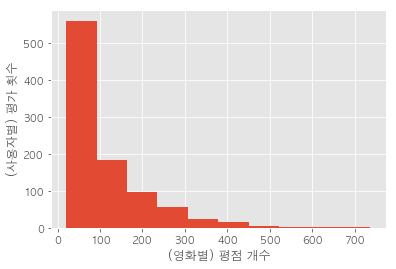

In [22]:
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
plt.style.use('ggplot')

#user_id별 평가 횟수 히스토그램
lens.groupby('user_id').size().sort_values(ascending=False).hist()

plt.xlabel('(영화별) 평점 개수')
plt.ylabel('(사용자별) 평가 횟수')

lens.groupby('user_id').size().sort_values(ascending=False)[:15]

# 빈도가 낮아지는 모양이 롱테일 분포를 보인다. 지프의 법칙을 따르기 때문

In [20]:
user_stats = lens.groupby('user_id').agg({'rating':[np.size,np.mean]})
user_stats['rating'].describe()

# 평균이 1.4 수준인 사용자 / 평균이 4.8인 사용자 -> 사용자에도 편향이 있다

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


## 추천 시스템 구현 - 인수분해 머신을 이용한 추천

인수분해 머신의 특징

- 행렬 인수분해는 사용자와 아이템 정보만을 다루지만, 인수분해 머신은 그 외의 특징도 다룰 수 있다
- 로지스틱과 달리 행렬 인수분해처럼 희소한 행렬을 다룰 수 있다
- 특징끼리 영향을 주고받는 상호작용을 계산에 넣을 수 있기에, 상관관계를 갖는 특징도 다룰 수 있다

* 범주형 데이터를 더미변수로 변환해 범주끼리의 상호